**Created by Sanskar Hasija**

**Song Popularity Prediction- H20 AUTOML 🤖**

**19 JANUARY 2022**


# <center> SONG POPULARITY PREDICTION - H20 AUTOML 🤖</center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Imports

In [1]:
from IPython.display import clear_output

import numpy as np
import pandas as pd

import h2o
from h2o.automl import H2OAutoML

# Initializing H20 Cluster

In [2]:
from h2o.automl import H2OAutoML
h2o.init()
clear_output()

# Data Loading and Preprocessing

In [3]:
train = pd.read_csv("../input/song-popularity-prediction/train.csv")
test = pd.read_csv("../input/song-popularity-prediction/test.csv")
subs = pd.read_csv("../input/song-popularity-prediction/sample_submission.csv")

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
train.describe()

Rows:40000
Cols:15




,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
type,int,int,real,real,real,real,int,real,real,int,real,real,int,real,int
mins,0.0,25658.0,-0.0135511552613696,0.0439606763362077,-0.0016822004137934,-0.0043980509966391,0.0,0.0278431130171187,-32.117910852313194,0.0,0.0150646591183137,62.05577907947696,2.0,0.0133978546055058,0.0
mean,19999.5,193165.84757235544,0.27640443038795165,0.5709511548062322,0.6839319477138375,0.036526755987754074,5.042604702935854,0.19851369124259596,-7.407596207923757,0.32115,0.09410654997438588,116.56281488147955,3.394374999999997,0.5806448560934723,0.3644
maxs,39999.0,491671.0,1.0652843610501974,0.9571308047062228,1.0397413046716637,1.0754146806463265,11.0,1.0652980309790911,-0.8773458492126069,1.0,0.5607483509425971,219.16357815182727,5.0,1.022557575991481,1.0
sigma,11547.149720457714,45822.12767873012,0.2979279292732251,0.19001048177959726,0.2126620001780217,0.15002390250923878,3.372727801078067,0.15166991342438588,3.877197599462794,0.46692411369857395,0.08359080852981951,26.167910622054425,0.5244046475584092,0.23735076368850347,0.4812675248349524
zeros,1,0,0,0,0,0,5175,0,0,27154,0,0,0,0,25424
missing,0,4101,3992,4026,3975,3985,4065,4086,3957,0,0,0,0,0,0
0,0.0,212990.0,0.6422855173628494,0.856520289337845,0.7070729145792185,0.0020014003683315,10.0,nan,-5.619087886398954,0.0,0.0825695868720497,158.38623597149538,4.0,0.734641556566576,0.0
1,1.0,nan,0.0548656387519871,0.733288830346718,0.8355448104272071,0.0009956592034431,8.0,0.4364280587619082,-5.236965003084969,1.0,0.1273584942720993,102.75298842030163,3.0,0.711530550966967,1.0
2,2.0,193213.0,nan,0.1883870987713084,0.7835236013353863,-0.0026940563945809,5.0,0.1704986788521591,-4.951758857474628,0.0,0.0522816125702891,178.6857910658144,3.0,0.4255360161572187,0.0


# AutoML

In [5]:
RANDOM_STATE = 12
RUNTIME = 3600* 2 #2 hours
N_FOLDS = 5
STOPPING_METRIC = "auto"
SORT_METRIC = "auc"

x = train.columns
y = "song_popularity"
x.remove(y)
x.remove('id')

train[y] = train[y].asfactor()

In [6]:
aml = H2OAutoML(stopping_metric=STOPPING_METRIC , 
                nfolds=N_FOLDS, seed=RANDOM_STATE,
                max_runtime_secs=RUNTIME , 
                sort_metric = SORT_METRIC)
aml.train(x=x, y=y, training_frame=train)
clear_output()

# Results Leaderboard

### Top 10 models

In [7]:
lb = aml.leaderboard
lb.head(10)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20220118_212048,0.576173,0.647529,0.424622,0.471001,0.477268,0.227785
StackedEnsemble_Best1000_1_AutoML_1_20220118_212048,0.575879,0.64757,0.424579,0.476299,0.477288,0.227804
StackedEnsemble_AllModels_4_AutoML_1_20220118_212048,0.575761,0.647644,0.423542,0.46973,0.477328,0.227842
StackedEnsemble_BestOfFamily_4_AutoML_1_20220118_212048,0.575518,0.647753,0.422713,0.467952,0.477378,0.22789
StackedEnsemble_BestOfFamily_7_AutoML_1_20220118_212048,0.575251,0.647965,0.422336,0.479963,0.477471,0.227979
StackedEnsemble_AllModels_7_AutoML_1_20220118_212048,0.574536,0.647917,0.422817,0.474025,0.477452,0.22796
XGBoost_grid_1_AutoML_1_20220118_212048_model_45,0.573701,0.648103,0.421273,0.473143,0.477553,0.228057
XGBoost_grid_1_AutoML_1_20220118_212048_model_33,0.572701,0.648671,0.420451,0.485518,0.477795,0.228288
XGBoost_grid_1_AutoML_1_20220118_212048_model_31,0.572612,0.648582,0.421118,0.489944,0.477768,0.228263
GBM_grid_1_AutoML_1_20220118_212048_model_16,0.57101,0.649198,0.418974,0.478168,0.47805,0.228532


### Models Correlation

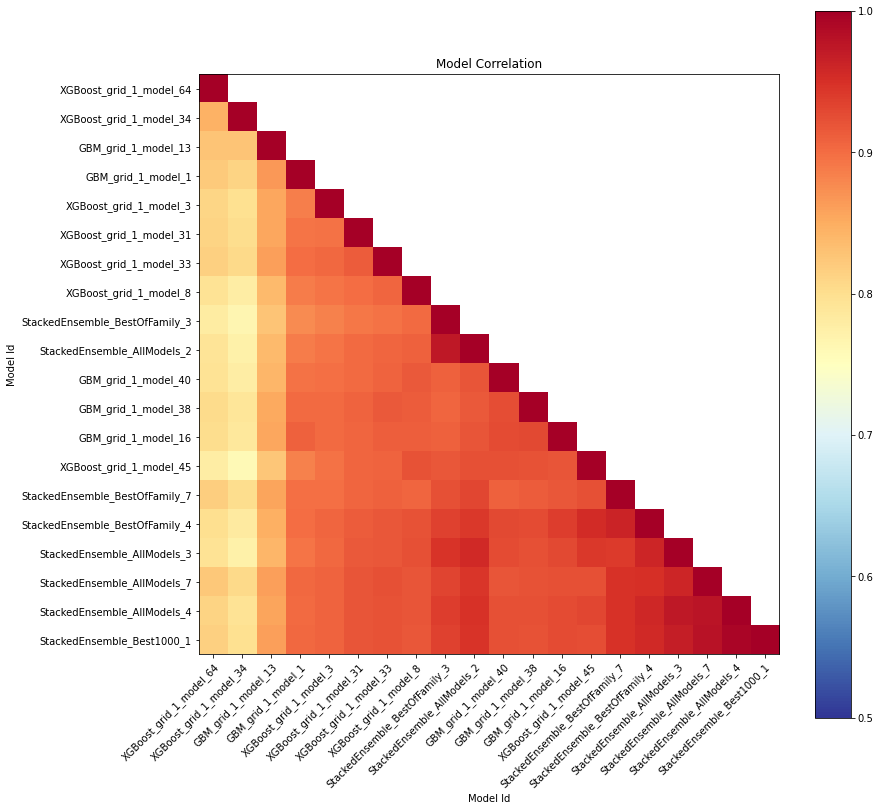

In [8]:
mc_plot = aml.model_correlation_heatmap(train)

# Submission

In [9]:
sub = aml.leader.predict(test).as_data_frame()["p1"]
clear_output()
subs['song_popularity'] = sub
subs.to_csv('submission.csv',index = False)
subs.head()

,id,song_popularity
0,0,0.425464
1,1,0.479685
2,2,0.227759
3,3,0.330024
4,4,0.356407
